In [16]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 회귀분석

예측(prediction)문제 중에서도 출력변수의 값이 연속적인 값을 다루는 문제를 회귀(regression) 또는 회귀분석(regression analysis)이라 한다.

## 보스턴 주택가격 예측

독립변수

CRIM: 범죄율

INDUS: 비소매상업지역 면적 비율

NOX: 일산화질소 농도

RM: 주택당 방 수

LSTAT: 인구 중 하위 계층 비율

B: 인구 중 흑인 비율

PTRATIO: 학생/교사 비율

ZN: 25,000 평방피트를 초과 거주지역 비율

CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

AGE: 1940년 이전에 건축된 주택의 비율

RAD: 방사형 고속도로까지의 거리

DIS: 직업센터의 거리

TAX: 재산세율

종속변수

보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

## Boston 주택가격 데이터 로드

In [17]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

data: 독립변수 ndarray 배열

target: 종속변수 ndarray 배열

feature_names: 독립변수 이름 리스트

target_names: (옵션) 종속변수 이름 리스트

DESCR: (옵션) 자료에 대한 설명 문자열

독립변수를 dfX, 종속변수를 dfy라는 이름의 데이터프레임을 생성 

In [21]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

앞서 생성한 두 데이터프레임을 하나의 데이터프레임으로 묶는다.

In [23]:
df = pd.concat([dfX, dfy], axis=1) # 열방향 병합
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## 독립변수와 종속변수간의 관계파악

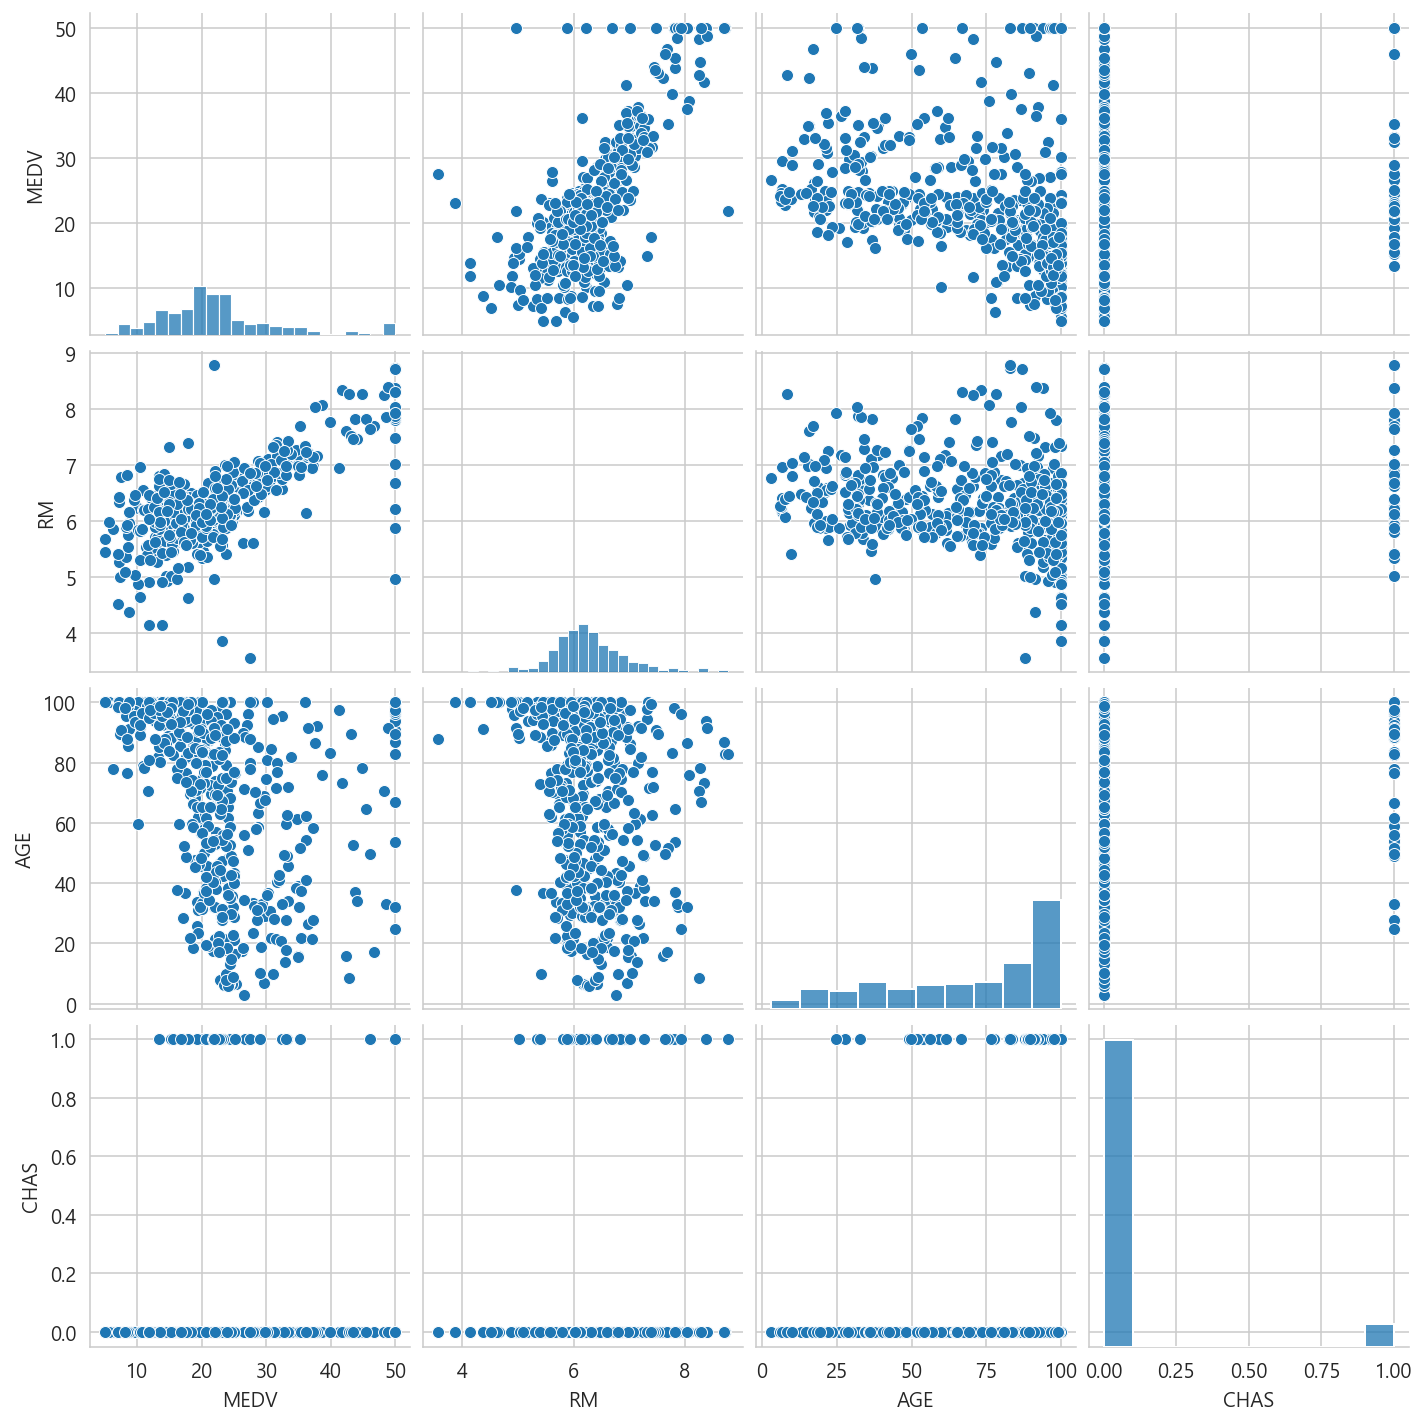

In [24]:
sns.pairplot(df[['MEDV', 'RM', 'AGE', "CHAS"]])
plt.show()

산점도를 통해 종속변수(MEDV)와 독립변수(RM), (AGE)와 다음의 관계가 있다는 것을 알 수 있다.

- 방 개수가 증가할수록 집값을 뚜렷하게 증가하는 경향이 있다.
- 노후화 정도와 집값의 관계는 없는 것으로 보인다.

범주형 데이터인 (CHAS)의 경우 찰스강 유역 여부를 나타내며 0일 때 보다 1일 때 집값의 평균이 더 높아지는 것을 확인할 수 있다.

## 당뇨병 진행도 예측

In [25]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


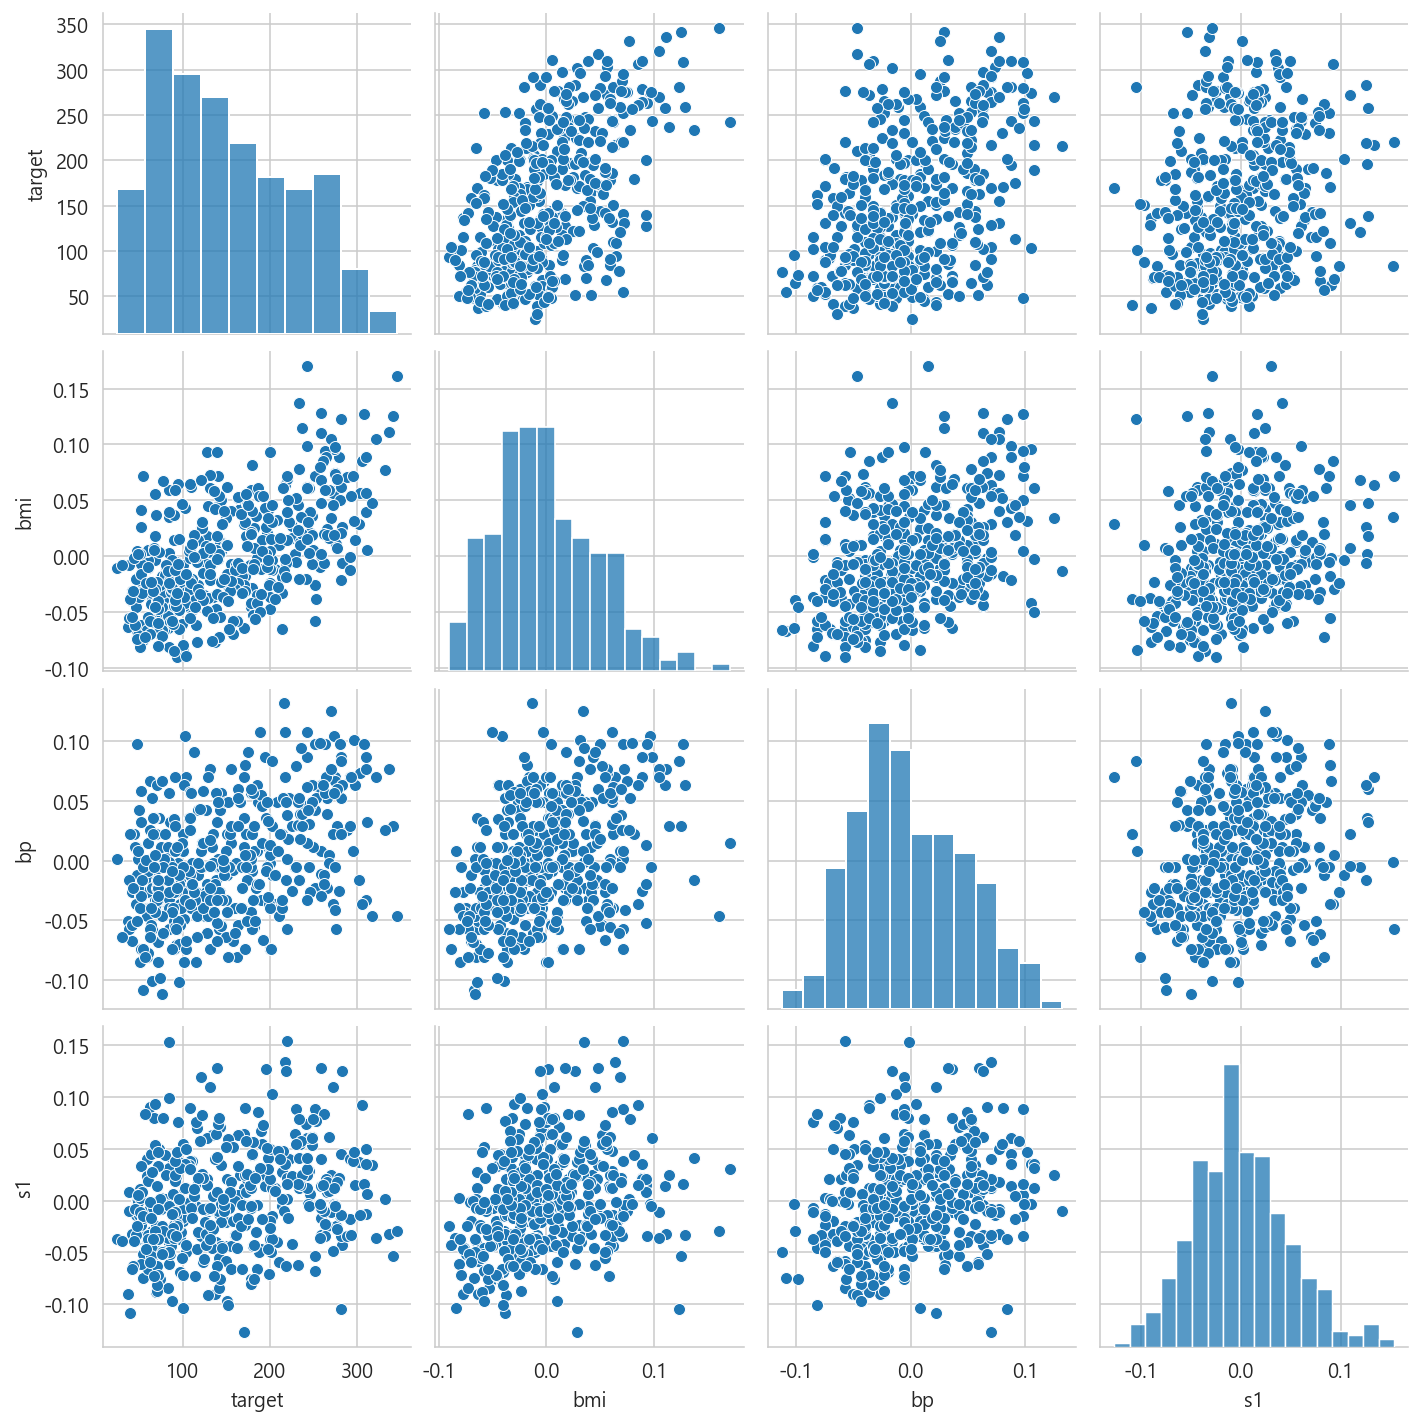

In [26]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

위 스캐터플롯 결과를 통해 독립변수인 BMI지수, 평균혈압이 종속변수인 당뇨병 진행도와 양의 상관관계가 있다는 것을 확인할 수 있다.

그런데 두 독립변수인 BMI지수, 평균혈압이 서로 양의 상관관계를 가지고 있다.

이렇게 독립변수간에 상관관계를 가지는 것을 다중공선성문제(multicolinearity)라고 한다.

다중공선성문제는 회귀분석 결과에 영향을 미칠 수 있다.

## 가상 데이터 예측

실제 데이터를 다룰 때의 문제는 정답을 모른다.

따라서 실제 데이터를 다루기 이전에 가상데이터를 다룬다.

가상 데이터는 회귀분석의 정답을 가지고있다.

따라서 회귀분석 이후 정답을 제대로 맞췄는지를 파악할 수 있다.

`make_regression()` : 가상의 회귀분석 문제를 만들어주는 메소드

`X, y, w = make_regression(n_samples, n_features, bias, noise, random_state, coef=True)`

- n_samples: 정수(옵션, 디폴트 100)
    - 표본 데이터 갯수 N
- n_features : 정수(옵션, 디폴트 100)
    - 독립변수의 수(차원) M
- bias : 실수(옵션, 디폴트, 0)
    - y절편
- noise : 실수(옵션, 디폴트 0)
    - 종속변수에 더해지는 잡음$\epsilon$의 표준편차
- coef : 불린(옵션, 디폴트 false)
    - True : 선형 모형의 계수(정답) 출력


출력값

- X : [n_samples, n_features] 형상의 2차원 배열
    - 독립변수의 표본 데이터 행렬 $X$
- y : [n_samples] 형상의 1차원 배열
    - 종속변수의 표본 데이터 벡터 $y$
- w : [n_features] 형상의 1차원 배열 또는 [n_features, n_target]형상의 2차원 배열


1. 독립변수 데이터 행렬 x를 무작위 생성
2. 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위 생성
3. X와 w를 내적하고 y절편 b를 더하여 독립변수와 완전선형인 종속변수 벡터 y_0를 생성
4. 기댓값이 0이고 표준편차가 noise인 정규분포를 이용해 잡음을 생성
5. 독립변수와 완전선형인 종속변수 벡터 y_0에 잡음을 더해 종속변수 데이터 y를 생성

$$y = w^Tx + b + \epsilon$$

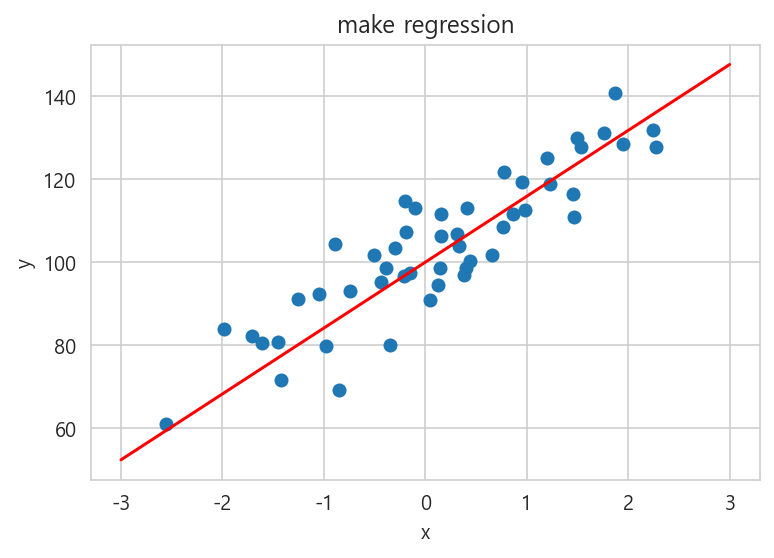

In [246]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features = 1, bias = 100, noise = 10, coef = True, random_state=0
)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, 'r-')
plt.scatter(X, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('make regression')
plt.show()

## make_regression() 명령 구현

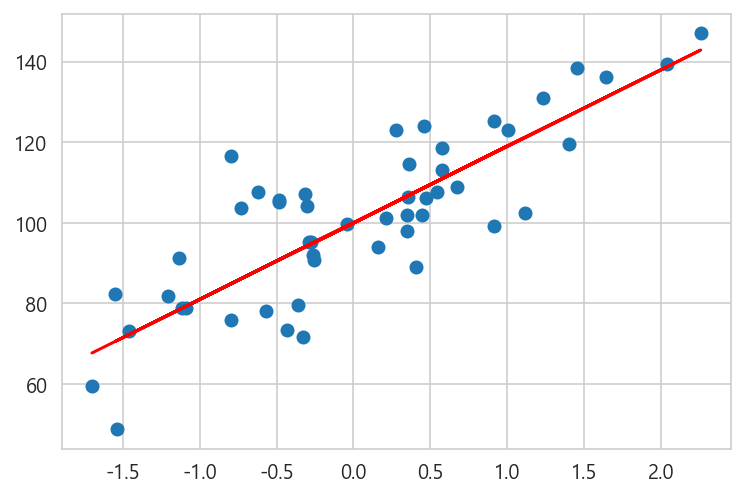

In [327]:
import scipy as sp
import scipy.stats


def get_x(n_samples, n_features):
    return np.random.randn(n_samples, n_features)

def get_w(n_features, bias):
    return np.random.randint(n_features, bias)

def get_regression(n_samples, n_features, bias, noise):
    x = get_x(n_samples, n_features)
    w = get_w(n_features, bias)
    y0 = x * w + bias
    
    error = sp.stats.norm(0, noise).rvs([n_samples, n_features])
    y = y0 + error
    return x, w, y, y0

x, w, y, y0 = get_regression(50, 1, 100, 10)

plt.plot(x, y0, 'r-')
plt.scatter(x, y)

**make regression**문제에서 데이터의 선형적인 모습이 제대로 나타나지 않는다면 error(잡음)에 비해 기울기 w값이 너무 작은 것이다. 예를 들어 기울기는 1 미만의 값인데 error가 10 이상의 값이라면 너무 작은 기울기로 인해 데이터의 선형성이 나타나지 않는 것이다.

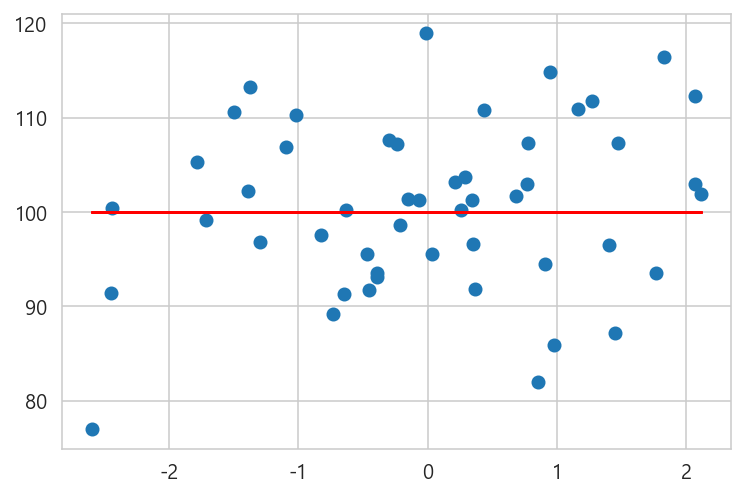

In [337]:
import scipy as sp
import scipy.stats


def get_x(n_samples, n_features):
    return np.random.randn(n_samples, n_features)

def get_w(n_features):
    return np.random.randint(n_features)

def get_regression(n_samples, n_features, bias, noise):
    x = get_x(n_samples, n_features)
    w = get_w(n_features)
    y0 = x * w + bias
    
    error = sp.stats.norm(0, noise).rvs([n_samples, n_features])
    y = y0 + error
    return x, w, y, y0

x, w, y, y0 = get_regression(50, 1, 100, 10)

plt.plot(x, y0, 'r-')
plt.scatter(x, y)

바로 이러한 경우이다.

epsilon만 정규분포를 따르고 가상의 데이터를 만들 때는 어떤 분포를 이용해도 상관없다.

## 독립변수가 2개인 경우

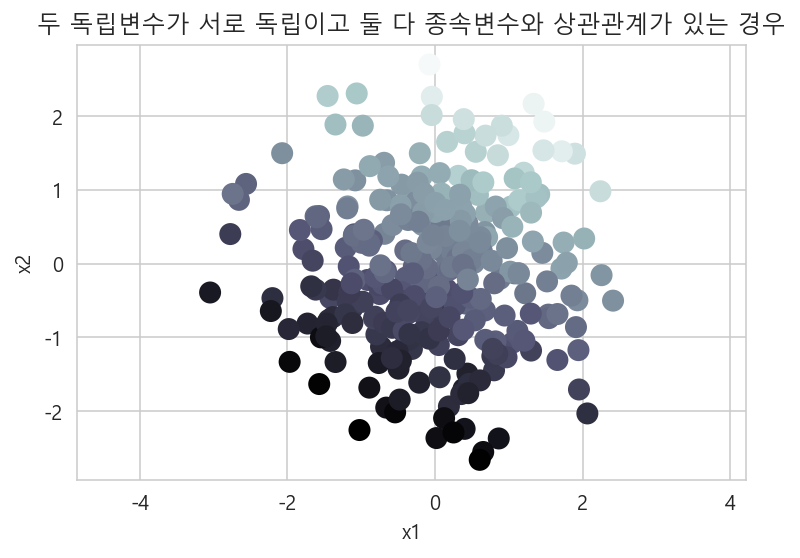

In [348]:
X, y, w = make_regression(
    n_samples = 300, n_features = 2, noise = 10, coef = True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.title('두 독립변수가 서로 독립이고 둘 다 종속변수와 상관관계가 있는 경우')
plt.show()

x축은 첫번째 독립변수, y축은 두번째 독립변수로 놓고 y값이 높을수록 그 색이 연해지도록 설정했다.

위 그래프를 통해 x1이 증가할수록 색이 옅어지고 x2또한 증가할수록 색이 옅어지는 것을 확인할 수 있다.

따라서 두 독립변수 모두 종속변수와 상관관계가 있는 것을 파악할 수 있다.

make_regression 명령의 추가적인 파라미터

- n_informative : 정수 (옵션, 디폴트 10)
    - 독립변수 중 실제로 종속변수와 상관관계가 있는 독립변수의 수(차원)
- effective_rank : 정수 또는 None(옵션, 디폴트 None)
    - 독립변수 중 서로 독립인 독립변수의 수 만약 None이면 모두 독립
- tail_strength : 0부터 1사이의 실수(옵션, 디폴트 0.5)
    - effective_rank가 None이 아닌 경우 독립변수간의 상관관계를 결정하는 변수 0.5이면 독립변수간 상관관계가 없다.

다음의 예는 두 독립변수 중 실제로 종속변수에 영향을 미치는 독립변수는 하나인 경우이다.

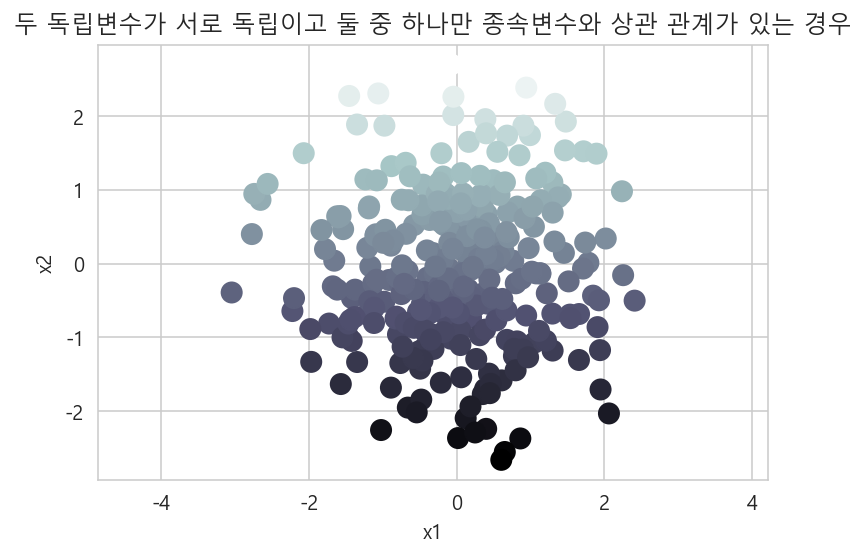

In [350]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.show()

두 독립변수가 서로 독립이 아니고 상관관계를 가지는 다중공선성 데이터인 경우 tail_strength인수를 0에 가까운 값으로 설정

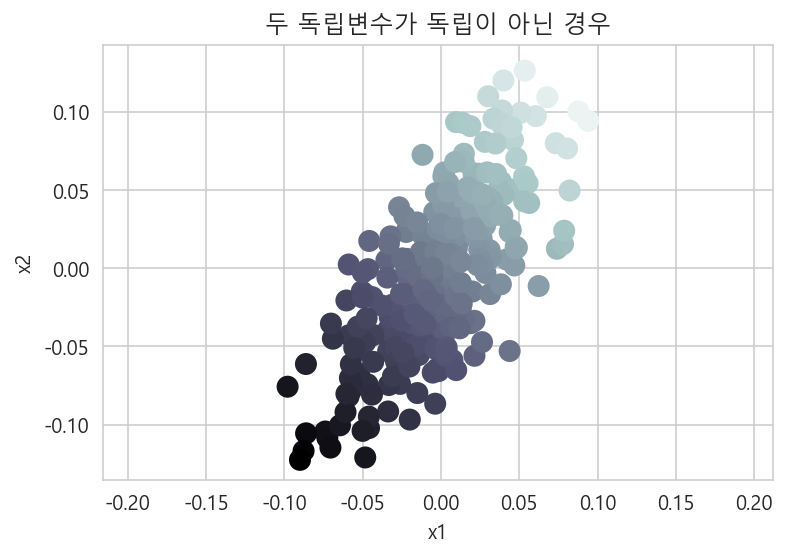

In [351]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()

다중공선성 문제를 가진 데이터의 경우 x1이 증가하면서 x2또한 증가하는 모습을 보인다.

이 현상이 발생할 경우 회귀분석에 악영향을 미친다.